In [1]:
#Importaciones
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import markers
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

In [2]:
df= pd.read_csv('examenm3.csv')
df.head(5)

,no_reg,battery_power,clock_speed,int_memory,m_dep,n_cores,wifi,px_height,touch_screen,px_width,ram
0,1,1757,0.5,49.0,NaN,6.0,NO,265,N,713,2056.0
1,2,1866,1.4,30.0,NaN,3.0,NO,108,N,1781,3834.0
2,3,617,2.3,32.0,NaN,7.0,NO,768,N,874,2213.0
3,4,1356,2.8,29.0,NaN,6.0,NO,1612,N,1983,3702.0
4,5,1049,2.2,63.0,NaN,5.0,NO,199,N,1077,1022.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   no_reg         1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   int_memory     973 non-null    float64
 4   m_dep          0 non-null      float64
 5   n_cores        153 non-null    float64
 6   wifi           991 non-null    object 
 7   px_height      1000 non-null   int64  
 8   touch_screen   1000 non-null   object 
 9   px_width       1000 non-null   int64  
 10  ram            992 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 86.1+ KB


In [4]:
df.drop(['m_dep'],axis=1,inplace=True)

In [5]:
df.drop(['no_reg'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   clock_speed    1000 non-null   float64
 2   int_memory     973 non-null    float64
 3   n_cores        153 non-null    float64
 4   wifi           991 non-null    object 
 5   px_height      1000 non-null   int64  
 6   touch_screen   1000 non-null   object 
 7   px_width       1000 non-null   int64  
 8   ram            992 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [7]:
df.isnull().sum()

battery_power      0
clock_speed        0
int_memory        27
n_cores          847
wifi               9
px_height          0
touch_screen       0
px_width           0
ram                8
dtype: int64

In [9]:
df['int_memory'] = df['int_memory'].fillna(df['int_memory'].mean())

In [10]:
df['wifi'] = df['wifi'].fillna(df['wifi'].mode()[0])

In [11]:
df['ram'] = df['ram'].fillna(df['ram'].mean())

In [8]:
df['n_cores'] = df['n_cores'].fillna(df['n_cores'].mean())

In [12]:
df.isnull().sum()

battery_power    0
clock_speed      0
int_memory       0
n_cores          0
wifi             0
px_height        0
touch_screen     0
px_width         0
ram              0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   clock_speed    1000 non-null   float64
 2   int_memory     1000 non-null   float64
 3   n_cores        1000 non-null   float64
 4   wifi           1000 non-null   object 
 5   px_height      1000 non-null   int64  
 6   touch_screen   1000 non-null   object 
 7   px_width       1000 non-null   int64  
 8   ram            1000 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [14]:
le = LabelEncoder()
df["wifi"] = le.fit_transform(df["wifi"])
df["touch_screen"] = le.fit_transform(df["touch_screen"])

In [15]:
df.wifi.value_counts()

0    519
1    481
Name: wifi, dtype: int64

In [16]:
df.touch_screen.value_counts()

1    513
0    487
Name: touch_screen, dtype: int64

In [17]:
df.head()

,battery_power,clock_speed,int_memory,n_cores,wifi,px_height,touch_screen,px_width,ram
0,1757,0.5,49.0,6.0,0,265,0,713,2056.0
1,1866,1.4,30.0,3.0,0,108,0,1781,3834.0
2,617,2.3,32.0,7.0,0,768,0,874,2213.0
3,1356,2.8,29.0,6.0,0,1612,0,1983,3702.0
4,1049,2.2,63.0,5.0,0,199,0,1077,1022.0


## Método del Codo

In [18]:
inercia = []
for i in range (2,20):
    km = KMeans(n_clusters=i, init='random',max_iter=300,n_init=10,tol=1e-04, random_state=0)
    km.fit(df)
    inercia.append(km.inertia_)
inercia

[883619250.4933957,
 705746552.3151177,
 611492224.9993931,
 538057592.3966451,
 489763517.19985175,
 453147261.08051306,
 417214644.32007235,
 389863129.0427899,
 367321435.2290818,
 346535108.78856766,
 332345456.5376239,
 315499450.2554992,
 298951171.6394323,
 286181659.4512879,
 275471337.394674,
 266276161.9042505,
 256666375.21715325,
 246499442.25440854]

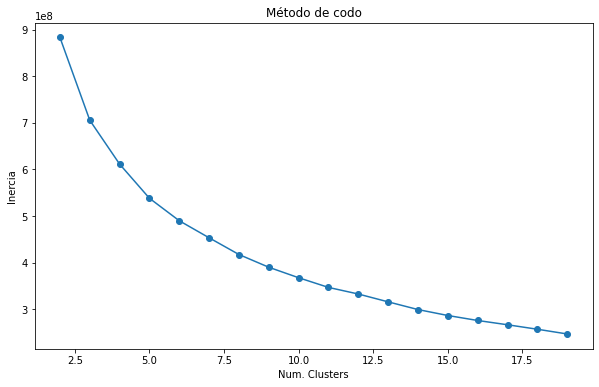

In [19]:
plt.figure(figsize=[10,6])
plt.title('Método de codo')
plt.xlabel('Num. Clusters')
plt.ylabel('Inercia')
plt.plot(list(range(2,20)),inercia, marker='o')

plt.figure(figsize=[10,6])
plt.title('Método de codo')
plt.xlabel('Num. Clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)),inercia, marker='o')

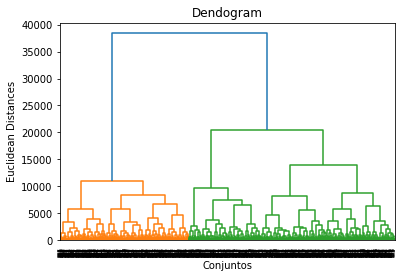

In [20]:
dendogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendogram')
plt.xlabel('Conjuntos')
plt.ylabel('Euclidean Distances')
plt.show()

In [21]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
y_Agc = hc.fit_predict(df)
y_Agc

array([0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2,
       1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1,
       1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1,

In [22]:
df['tipo'] = y_Agc
df.head()

,battery_power,clock_speed,int_memory,n_cores,wifi,px_height,touch_screen,px_width,ram,tipo
0,1757,0.5,49.0,6.0,0,265,0,713,2056.0,0
1,1866,1.4,30.0,3.0,0,108,0,1781,3834.0,2
2,617,2.3,32.0,7.0,0,768,0,874,2213.0,0
3,1356,2.8,29.0,6.0,0,1612,0,1983,3702.0,2
4,1049,2.2,63.0,5.0,0,199,0,1077,1022.0,1


In [23]:
x = df.iloc[:,:-1]
x

,battery_power,clock_speed,int_memory,n_cores,wifi,px_height,touch_screen,px_width,ram
0,1757,0.5,49.0,6.000000,0,265,0,713,2056.000000
1,1866,1.4,30.0,3.000000,0,108,0,1781,3834.000000
2,617,2.3,32.0,7.000000,0,768,0,874,2213.000000
3,1356,2.8,29.0,6.000000,0,1612,0,1983,3702.000000
4,1049,2.2,63.0,5.000000,0,199,0,1077,1022.000000
...,...,...,...,...,...,...,...,...,...
995,595,0.9,23.0,4.849673,0,441,1,810,3752.000000
996,1310,2.2,51.0,4.849673,0,178,1,1919,2085.160282
997,1725,1.6,6.0,2.000000,0,609,1,1307,3429.000000
998,1253,0.5,5.0,2.000000,0,685,1,714,1878.000000


In [24]:
y = df.iloc[:,-1]
y

0      0
1      2
2      0
3      2
4      1
      ..
995    2
996    0
997    2
998    1
999    0
Name: tipo, Length: 1000, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y, test_size=0.2)
x_train.shape

(800, 9)

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt
arbol_decision = tree.DecisionTreeClassifier(criterion="gini",max_depth=3)

arbol = arbol_decision.fit(x_train, y_train)
accuracy = arbol_decision.score(x_test,y_test)
print(accuracy)

0.9


In [27]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(arbol, x, y, scoring = "accuracy", cv=5, n_jobs=-1)
score

array([0.87 , 0.915, 0.92 , 0.89 , 0.93 ])

In [28]:
score.mean()

0.905

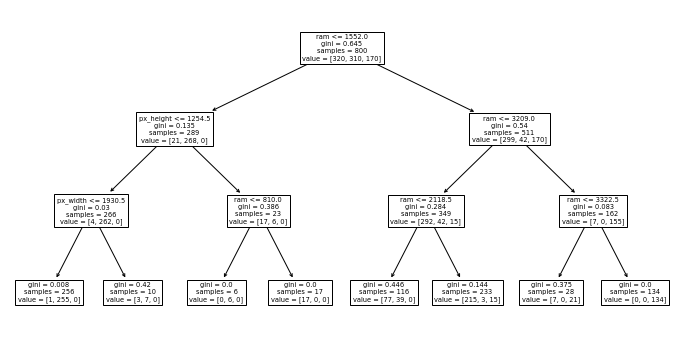

In [30]:
plt.figure(figsize=(12,6))
tree.plot_tree(arbol, feature_names=["battery_power","clock_speed","n_cores","int_memory","wifi","px_height","touch_screen","px_width","ram"])

plt.show()

In [31]:
print(tree.export_text(arbol, feature_names=["battery_power","clock_speed","n_cores","int_memory","wifi","px_height","touch_screen","px_width","ram"]))

|--- ram <= 1552.00
|   |--- px_height <= 1254.50
|   |   |--- px_width <= 1930.50
|   |   |   |--- class: 1
|   |   |--- px_width >  1930.50
|   |   |   |--- class: 1
|   |--- px_height >  1254.50
|   |   |--- ram <= 810.00
|   |   |   |--- class: 1
|   |   |--- ram >  810.00
|   |   |   |--- class: 0
|--- ram >  1552.00
|   |--- ram <= 3209.00
|   |   |--- ram <= 2118.50
|   |   |   |--- class: 0
|   |   |--- ram >  2118.50
|   |   |   |--- class: 0
|   |--- ram >  3209.00
|   |   |--- ram <= 3322.50
|   |   |   |--- class: 2
|   |   |--- ram >  3322.50
|   |   |   |--- class: 2

